Dataset taken from https://github.com/godlytalias/Bible-Database <br>
JSON Database have fields `Verse` & `Verseid`. `Verseid` field is a unique id which is a comibination of Book + Chapter + Verse. First two digits represents Book(0 - 65), Second three digits represent Chapter and last three digits represent Verse. Book, Chapter and Verse starts from 0.

In [1]:
import json
import ast
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
f = open('Hindi_bible.json',encoding="utf8")
data = json.load(f)

#### Flattening JSON 

In [2]:
def flatten_json(y):
    out = {}
    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x
    flatten(y)
    return out
flat = flatten_json(data)

#### Converting dictionary to pandas dataframe

In [3]:
bib = pd.DataFrame.from_dict(flat, orient='index')
bib = bib.iloc[1::2]
bib.columns = ['Text']
bib.head()

,Text
Book_0_Chapter_0_Verse_0_Verse,आदि में परमेश्वर ने आकाश और पृथ्वी की सृष्टि की।
Book_0_Chapter_0_Verse_1_Verse,और पृथ्वी बेडौल और सुनसान पड़ी थी; और गहरे जल ...
Book_0_Chapter_0_Verse_2_Verse,"तब परमेश्वर ने कहा, उजियाला हो: तो उजियाला हो ..."
Book_0_Chapter_0_Verse_3_Verse,और परमेश्वर ने उजियाले को देखा कि अच्छा है; और...
Book_0_Chapter_0_Verse_4_Verse,और परमेश्वर ने उजियाले को दिन और अन्धियारे को ...


### Making the database

In [4]:
bib.index = bib.index.str.replace('_Verse', '')
bib.index = bib.index.str.replace('_Chapter', '')
bib.index = bib.index.str.replace('Book_', '')
bib.index = bib.index.str.replace('_', '-')
bib['Verse id'] = bib.index
bib.head()

,Text,Verse id
0-0-0,आदि में परमेश्वर ने आकाश और पृथ्वी की सृष्टि की।,0-0-0
0-0-1,और पृथ्वी बेडौल और सुनसान पड़ी थी; और गहरे जल ...,0-0-1
0-0-2,"तब परमेश्वर ने कहा, उजियाला हो: तो उजियाला हो ...",0-0-2
0-0-3,और परमेश्वर ने उजियाले को देखा कि अच्छा है; और...,0-0-3
0-0-4,और परमेश्वर ने उजियाले को दिन और अन्धियारे को ...,0-0-4


In [5]:
bl,cl,vl= [],[],[]
for i in bib.index.str.split('-'):
    bl.append(i[0])
    cl.append(i[1])
    vl.append(i[2])
df = pd.DataFrame(list(map(list, zip(*[bl,cl,vl]))), columns=["Book", "Chapter", "Verse"])
df.Book = df.Book.apply(lambda x: int(x))
df.Chapter = df.Chapter.apply(lambda x: int(x))
df.Verse = df.Verse.apply(lambda x: int(x))
df.head()

,Book,Chapter,Verse
0,0,0,0
1,0,0,1
2,0,0,2
3,0,0,3
4,0,0,4


#### Adding book names to the dataset

In [6]:
Books = ["उत्पत्ति","निर्गमन","लैव्यवस्था","गिनती","व्यवस्थाविवरण","यहोशू ",
		"न्यायियों","रूत","1 शमूएल","2 शमूएल","1 राजा","2 राजा",
		"1 इतिहास","2 इतिहास","एज्रा","नहेमायाह","एस्तेर","अय्यूब",
		"भजन संहिता","नीतिवचन ","सभोपदेशक","श्रेष्ठगीत","यशायाह","यिर्मयाह",
		"विलापगीत","यहेजकेल","दानिय्येल","होशे","योएल","आमोस","ओबद्दाह",
		"योना","मीका","नहूम","हबक्कूक","सपन्याह","हाग्गै","जकर्याह",
		"मलाकी","मत्ती","मरकुस","लूका","यूहन्ना","प्रेरितों के काम","रोमियो",
		"1 कुरिन्थियों","2 कुरिन्थियों","गलातियों","इफिसियों","फिलिप्पियों","कुलुस्सियों",
		"1 थिस्सलुनीकियों","2 थिस्सलुनीकियों","1 तीमुथियुस","2 तीमुथियुस","तीतुस",
		"फिलेमोन","इब्रानियों","याकूब","1 पतरस","2 पतरस","1 यूहन्ना","2 यूहन्ना",
		"3 यूहन्ना","यहूदा","प्रकाशित वाक्य"]
bib.index = range(0,len(bib))
bib = pd.concat([bib,df], axis=1)
bib['Book Name'] =bib["Book"].apply(lambda x: Books[x])
bib = bib[['Book','Chapter','Verse','Verse id','Book Name','Text']]
bib.head()

,Book,Chapter,Verse,Verse id,Book Name,Text
0,0,0,0,0-0-0,उत्पत्ति,आदि में परमेश्वर ने आकाश और पृथ्वी की सृष्टि की।
1,0,0,1,0-0-1,उत्पत्ति,और पृथ्वी बेडौल और सुनसान पड़ी थी; और गहरे जल ...
2,0,0,2,0-0-2,उत्पत्ति,"तब परमेश्वर ने कहा, उजियाला हो: तो उजियाला हो ..."
3,0,0,3,0-0-3,उत्पत्ति,और परमेश्वर ने उजियाले को देखा कि अच्छा है; और...
4,0,0,4,0-0-4,उत्पत्ति,और परमेश्वर ने उजियाले को दिन और अन्धियारे को ...


### Custom made Stopwords list

In [7]:
stopword = ['', 'अर्थात', 'कुछ', 'तेरी', 'साबुत', 'अपनि', 'हूं', 'काफि', 'यिह', 'जा' ,'दे', 'देकर' ,'रह', 'कह' , 'कर' , 'कहा', 'बात' , 'जिन्हों', 'किर', 'कोई', 'हे', 'कोन', 'रहा', 'सब', 'सो', 'तक', 'इंहें', 'इसकि', 'अपनी', 'दबारा', 'सभि', 'होते', 'भीतर', 'निचे', 'घर', 'उन्हें', 'उन्ह' , 'मेरे' , 'था', 'व', 'इसमें', 'उसी', 'बिलकुल', 'होति', 'गया', 'सकता', 'अपना', 'लिये', 'उसका', 'पर', 'दवारा', 'गए', 'है', 'कितना', 'भि', 'लिए', 'वुह ', 'ना', 'किसि', 'परन्तु', 'किन्हें', 'बहुत', 'भी', 'तुम्हारे', 'निहायत', 'उन्हीं', 'वहिं', 'हैं', 'उन्हों', 'इतयादि','यहाँ', 'तब', 'पूरा', 'क्योंकि', 'कौनसा', 'आप', 'हुअ', 'ऐसे', 'एस', 'कारण', 'अप', 'पहले', 'तुम', 'जेसा', 'तिस', 'लेकिन', 'कहते', 'मगर', 'करता', 'संग', 'सभी', 'जीधर', 'किंहों', 'हि', 'द्वारा', 'हुआ', 'तू', 'जिंहें', 'उसने', 'पास', 'वहां', 'वह', 'किंहें', 'इंहों', 'मुझ', 'कुल', 'तिंहों', 'का', 'मेरी', 'तेरे', 'उनके', 'क्या', 'जहाँ', 'काफ़ी', 'वर्ग', 'वरग','बही', 'ये', 'जिस', 'इसि', 'हुई', 'साम्हने', 'नहिं', 'जैसे', 'वहीं', 'दिया', 'अभी', 'यहि', 'वग़ैरह', 'उनकि', 'न', 'जा','बनि', 'हें', 'यिह ', 'उन', 'को', 'तिन्हों', 'उन्होंने', 'तुझे', 'उसे', 'होने', 'इन्हीं', 'थे', 'उंहिं', 'अपने', 'में', 'फिर','यही', 'नीचे', 'होती', 'तिसे', 'हम', 'यदि', 'सारा', 'कर', 'सकते', 'कोइ', 'और', 'जिंहों', 'तिंहें', 'दूसरे', 'जब', 'रहे','अत', 'मानो', 'जिन', 'बाद', 'उनका', 'किया', 'या', 'उनकी', 'कौन', 'ऐसा', 'सबसे', 'अनुसार', 'दुसरे', 'इन', 'अदि','जिसे', 'उसकी', 'इत्यादि', 'करना', 'यहां', 'हुए', 'तेरा', 'आदि', 'पर  ', 'वाले', 'कहता', 'किन्हों', 'किसे', 'जिन्हें', 'मे','होता', 'करने', 'साभ', 'अभि', 'उसको', 'कई', 'बनी', 'के', 'इन्हें', 'वहाँ', 'कोनसा', 'कइ', 'इनका', 'थि', 'बाला','ऱ्वासा', 'हो', 'उंहें', 'दुसरा', 'वे', 'भितर', 'जेसे', 'एवं', 'अंदर', 'दो', 'साथ', 'करें', 'जिधर', 'तरह', 'उसि', 'इस', 'एसे', 'तिन', 'नहीं', 'से','न','उनको', 'किस', 'किसी', 'इसी', 'मैं', 'यह', 'हुइ', 'ले', 'कि', 'की', 'इसलिये', 'रवासा', 'ने', 'जैसा', 'वह ', 'तिन्हें', 'वुह', 'उस', 'उंहों', 'वगेरह', 'उसके', 'मुझे', 'करते', 'जितना', 'जहां', 'इन्हों', 'इसके', 'होना', 'इसका', 'इंहिं', 'एक', 'जो', 'पे', 'ही', 'तो', 'थी', 'रखें', 'इसे', 'इन ', 'के', 'बहि', 'पुरा', 'ओर', 'इसकी']
len(set(stopword))

270

### Compiling and saving whole bible text in a text file `Full_text_Bible.txt`

In [8]:
text = ""
for i in range(len(bib)):
    text += bib['Text'][i]

In [9]:
with open("Full_text_Bible.txt", "w", encoding="utf-8") as text_file:
    print("{}".format(text), file=text_file)

In [10]:
bib['Testament Code'] =bib["Book"].apply(lambda x: 0 if x in range(39) else 1)
bib.head()

,Book,Chapter,Verse,Verse id,Book Name,Text,Testament Code
0,0,0,0,0-0-0,उत्पत्ति,आदि में परमेश्वर ने आकाश और पृथ्वी की सृष्टि की।,0
1,0,0,1,0-0-1,उत्पत्ति,और पृथ्वी बेडौल और सुनसान पड़ी थी; और गहरे जल ...,0
2,0,0,2,0-0-2,उत्पत्ति,"तब परमेश्वर ने कहा, उजियाला हो: तो उजियाला हो ...",0
3,0,0,3,0-0-3,उत्पत्ति,और परमेश्वर ने उजियाले को देखा कि अच्छा है; और...,0
4,0,0,4,0-0-4,उत्पत्ति,और परमेश्वर ने उजियाले को दिन और अन्धियारे को ...,0


In [11]:
#First verse of the New Testament
bib[bib['Verse id']=='39-0-0']

,Book,Chapter,Verse,Verse id,Book Name,Text,Testament Code
23164,39,0,0,39-0-0,मत्ती,"इब्राहीम की सन्तान, दाऊद की सन्तान, यीशु मसीह ...",1


### Exploratory Data Analysis

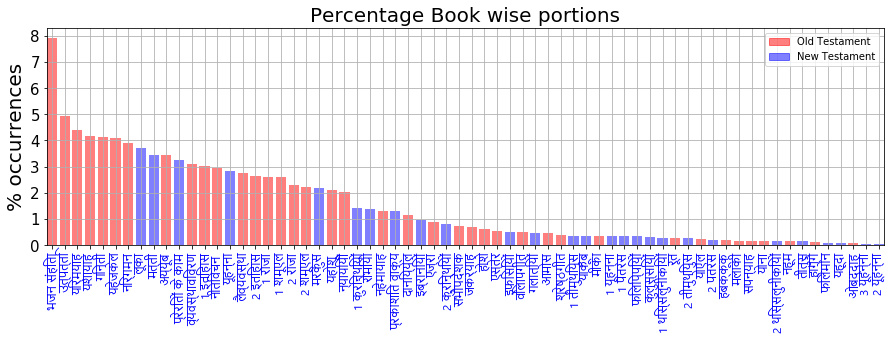

In [12]:
from matplotlib.font_manager import FontProperties
import matplotlib.patches as mpatches
df = pd.DataFrame(bib.groupby("Book Name").size()/(len(bib))*100, columns=["% occurrences"])
NT_books = ["मत्ती","मरकुस","लूका","यूहन्ना","प्रेरितों के काम","रोमियो",
           "1 कुरिन्थियों","2 कुरिन्थियों","गलातियों","इफिसियों","फिलिप्पियों","कुलुस्सियों",
            "1 थिस्सलुनीकियों","2 थिस्सलुनीकियों","1 तीमुथियुस","2 तीमुथियुस","तीतुस",
            "फिलेमोन","इब्रानियों","याकूब","1 पतरस","2 पतरस","1 यूहन्ना","2 यूहन्ना","3 यूहन्ना","यहूदा","प्रकाशित वाक्य"]
df["Testament"] = df.index.to_series().map(lambda x: 1 if x in NT_books else 0)
df = df.sort_values("% occurrences",ascending=False)
df.to_csv("Bible_portions.csv")
hindi_font = FontProperties(fname = "C:\\WINDOWS\\Fonts\\Nirmala.ttf")
colors = {0:'red', 1:'blue'}
red_patch = mpatches.Patch(color='red',alpha=0.5, label='Old Testament')
blue_patch = mpatches.Patch(color='blue',alpha=0.5, label='New Testament')
plt.bar(df.index, df["% occurrences"], align='center', alpha=0.5, color=df['Testament'].apply(lambda x: colors[x]))
plt.xticks(df.index, color="b", fontproperties=hindi_font, rotation=90, fontsize = 12)
plt.yticks(fontsize = 15)
plt.ylabel('% occurrences',fontsize = 20)
plt.title('Percentage Book wise portions',fontsize = 20)
plt.grid()
plt.legend(handles=[red_patch,blue_patch])
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.5 # inch margin
s = maxsize/plt.gcf().dpi*55+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

## Adding Traditional Authors to each book
Traditional author details is taken from: [authors-who-wrote-bible](https://overviewbible.com/authors-who-wrote-bible/). This is manual and complicated task. First the list of books of every author is created and then they are mapped to main dataframe `bib` to the verse level i.e. each row. I have handeled Psalms and Proverbs separately as their authorship structure is complex. Due to various authors of these books, these two books are handled on deeper level of Chapters whereas other books are handled on the level of Book Name only. 

In [13]:
# for Psalms
David = list(range(2,9))+list(range(10,41))+list(range(50,65))+list(range(67,70))+list(range(107,110))+[85,100,102,121,123,130,132]+list(range(137,145))
Asaph = list(range(72,83))+[49]
Korah = list(range(43,49))+[41,83,84,86,87]
Moses_1 = [89]
Solomon_1 =[71,126]
Ethan = [88]

# for Proverbs
Solomon_2 = list(range(0,29))
Agur = [29]
Lemuel = [30]

#for rest of the Books
Moses = list(range(0,5))
unknown = list(range(5,12))+[16,17]
Ezra = list(range(12,15))
Nehemiah = [15]
Isaiah = [22]
Jeremiah = [23,24]
Ezekiel = [25]
Daniel = [26]
Hosea = [27]
Joel = [28]
Amos = [29]
Obadiah = [30]
Jonah = [31]
Micah = [32]
Nahum = [33]
Habakkuk = [34]
Zaphaniah = [35]
Haggai = [36]
Zechariah = [37]
Malachi = [38]
Matthew = [39]
Luke = [41,43]
John_Mark = [40]
John = [42,61,62,63,65]
James = [58]
Peter  = [59,60]
Jude = [64]
Solomon =[20,21]
Paul = list(range(44,57))
def label_authors(row):
    if row['Book'] in Moses:
        return "Moses"
    if row['Book'] in Ezra:
        return "Ezra"
    if row['Book'] in Nehemiah:
        return "Nehemiah"
    if row['Book'] in Solomon:
        return "Solomon"
    if row['Book'] in Isaiah:
        return "Isaiah"
    if row['Book'] in Jeremiah:
        return "Jeremiah"
    if row['Book'] in Ezekiel:
        return "Ezekiel"
    if row['Book'] in Daniel:
        return "Daniel"
    if row['Book'] in Hosea:
        return "Hosea"
    if row['Book'] in Joel:
        return "Joel"
    if row['Book'] in Amos:
        return "Amos"
    if row['Book'] in Obadiah:
        return "Obadiah"
    if row['Book'] in Jonah:
        return "Jonah"
    if row['Book'] in Micah:
        return "Micah"
    if row['Book'] in Nahum:
        return "Nahum"
    if row['Book'] in Habakkuk:
        return "Habakkuk"
    if row['Book'] in Zaphaniah:
        return "Zaphaniah"
    if row['Book'] in Haggai:
        return "Haggai"
    if row['Book'] in Zechariah:
        return "Zechariah"
    if row['Book'] in Malachi:
        return "Malachi"
    if row['Book'] in Matthew:
        return "Matthew"
    if row['Book'] in Luke:
        return "Luke"
    if row['Book'] in John_Mark:
        return "John Mark"
    if row['Book'] in John:
        return "John"
    if row['Book'] in James:
        return "James"
    if row['Book'] in Peter:
        return "Peter"
    if row['Book'] in Jude:
        return "Jude"
    if row['Book'] in Paul:
        return "Paul"
    if row['Book'] ==18:
        if row['Chapter'] in David:
            return "David"
        if row['Chapter'] in Asaph:
            return "Asaph"
        if row['Chapter'] in Korah:
            return "Son of Korah"
        if row['Chapter'] in Solomon_1:
            return "Solomon"
        if row['Chapter'] in Ethan:
            return "Ethan"
        if row['Chapter'] in Moses_1:
            return "Moses"
        if row['Book'] in Paul:
            return "Paul"
        return "unknown"
    if row['Book'] ==19:
        if row['Chapter'] in Solomon_2:
            return "Solomon"
        if row['Chapter'] in Agur:
            return "Agur"
        return "Lemuel"
    return "unknown"
bib["Authors"] = bib.apply(lambda row: label_authors(row), axis=1)
df = pd.DataFrame(bib.groupby("Authors").size()/(len(bib))*100, columns=["% occurrences"])
df = df.sort_values("% occurrences",ascending=False)
df.head()

,% occurrences
Authors,
unknown,21.969088
Moses,18.858649
Luke,6.934224
Ezra,6.567912
Paul,6.532566


### Final Dataset

In [14]:
bib.head()
#saving the csv
bib.to_csv("Hindi_bible_with_authors.csv")

,Book,Chapter,Verse,Verse id,Book Name,Text,Testament Code,Authors
0,0,0,0,0-0-0,उत्पत्ति,आदि में परमेश्वर ने आकाश और पृथ्वी की सृष्टि की।,0,Moses
1,0,0,1,0-0-1,उत्पत्ति,और पृथ्वी बेडौल और सुनसान पड़ी थी; और गहरे जल ...,0,Moses
2,0,0,2,0-0-2,उत्पत्ति,"तब परमेश्वर ने कहा, उजियाला हो: तो उजियाला हो ...",0,Moses
3,0,0,3,0-0-3,उत्पत्ति,और परमेश्वर ने उजियाले को देखा कि अच्छा है; और...,0,Moses
4,0,0,4,0-0-4,उत्पत्ति,और परमेश्वर ने उजियाले को दिन और अन्धियारे को ...,0,Moses
